# Python之建模差分篇

* 递推关系
* 显式差分
* 马尔科夫链

![](./img/P8_1.png)

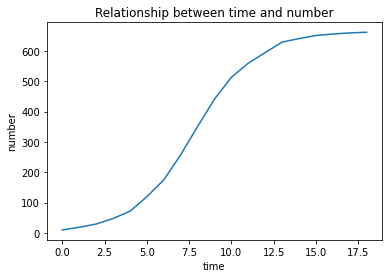

In [1]:
import matplotlib.pyplot as plt

time = [i for i in range(0, 19)]
number = [9.6,18.3,29,47.2,71.1,119.1,174.6,257.3,350.7,441.0,513.3,559.7,594.8,629.4,640.8,651.1,655.9,659.6,661.8]
plt.title('Relationship between time and number')  # 创建标题
plt.xlabel('time')  # X轴标签
plt.ylabel('number')  # Y轴标签
plt.plot(time, number)  # 画图
plt.show()  # 显示

![](./img/P8_2.png)

In [2]:
# 求解 k 值
import numpy as np
pn = [9.6,18.3,29,47.2,71.1,119.1,174.6,257.3,350.7,441.0,513.3,559.7,594.8,629.4,640.8,651.1,655.9,659.6]
deltap = [8.7,10.7,18.2,23.9,48,55.5,82.7,93.4,90.3,72.3,46.4,35.1,34.6,11.4,10.3,4.8,3.7,2.2]
pn = np.array(pn)
factor = pn*(665-pn)
f = np.polyfit(factor, deltap, 1)
print(f)

[ 0.00081448 -0.30791574]


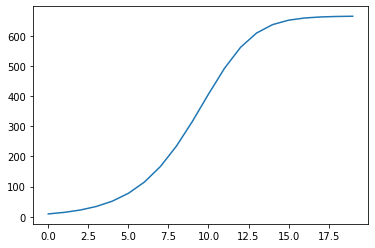

In [3]:
# 预测曲线
import matplotlib.pyplot as plt
p0 = 9.6
p_list = []
for i in range(20):
    p_list.append(p0)
    p0 = 0.00081448*(665-p0)*p0+p0
plt.plot(p_list)
plt.show()

![](./img/P8_3.png)

[0.         0.07996668 0.15660142 0.22990421 0.29987505 0.36651395
 0.42982091 0.48979592 0.54643898 0.5997501  0.64972928 0.69637651
 0.7396918  0.77967514 0.81632653 0.84964598 0.87963349 0.90628905
 0.92961266 0.94960433 0.96626406 0.97959184 0.98958767 0.99625156
 0.99958351 0.99958351 0.99625156 0.98958767 0.97959184 0.96626406
 0.94960433 0.92961266 0.90628905 0.87963349 0.84964598 0.81632653
 0.77967514 0.7396918  0.69637651 0.64972928 0.5997501  0.54643898
 0.48979592 0.42982091 0.36651395 0.29987505 0.22990421 0.15660142
 0.07996668 0.        ]


Text(0.5, 1.0, '一维热传导方程初值条件')

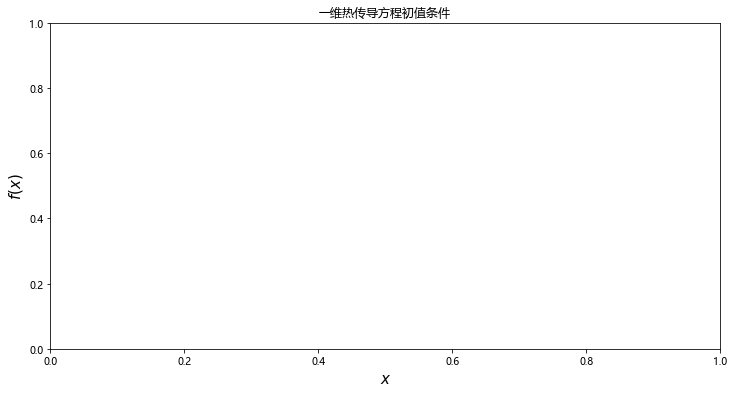

In [2]:
from matplotlib import pylab
import seaborn as sns
import numpy as np
#from CAL.PyCAL import *
#font.set_size(20)
# 设置中文字体
import matplotlib
matplotlib.rc("font", family='Microsoft YaHei')

def initialCondition(x):
    return 4.0*(1.0-x)*x

xArray = np.linspace(0,1.0,50)
#yArray = map(initialCondition, xArray)
yArray = initialCondition(xArray)
print(yArray)
pylab.figure(figsize=(12,6))
pylab.xlabel('$x$',fontsize=15)
pylab.ylabel('$f(x)$',fontsize=15)
#pylab.title(u'一维热传导方程初值条件',fontproperties=font)
pylab.title(u'一维热传导方程初值条件')

![](./img/P8_4.png)

![](./img/P8_5.png)

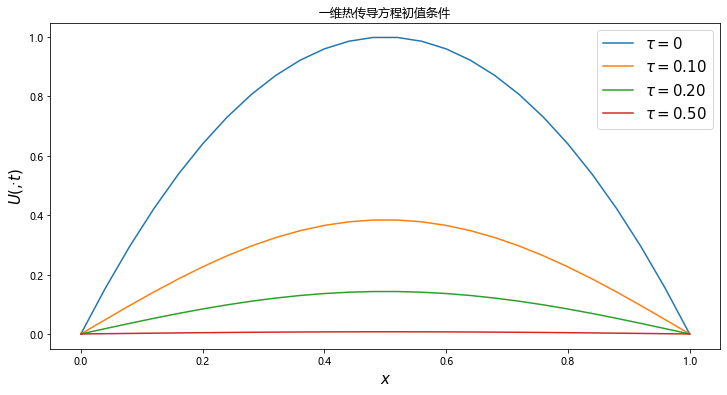

In [3]:
N = 25
M = 2500
T = 1.0
X = 1.0
xArray = np.linspace(0, 1.0, 26)
yArray = map(initialCondition, xArray)
yArray = initialCondition(xArray)
starValues = yArray
U = np.zeros((N+1,M+1))
U[:,0] = starValues
dx = X/N
dt = T/M
kappa = 1.0
rho = kappa*dt/dx/dx

for k in range(0,M):
    for j in range(1,N):
        U[j][k+1] = rho*U[j-1][k]+(1.-2*rho)*U[j][k]+rho*U[j+1][k]
        U[0][k+1] = 0.
        U[N][k+1] = 0.
        
pylab.figure(figsize=(12,6))
pylab.plot(xArray, U[:, 0])
pylab.plot(xArray, U[:, int(0.10/dt)])
pylab.plot(xArray, U[:, int(0.20/dt)])
pylab.plot(xArray, U[:, int(0.50/dt)])
pylab.xlabel('$x$',fontsize=15)
pylab.ylabel('$U(\dot,t)$',fontsize=15)
pylab.title(u'一维热传导方程初值条件')
pylab.legend([r'$\tau=0.$', r'$\tau=0.10$', r'$\tau=0.20$', r'$\tau=0.50$'], fontsize=15)

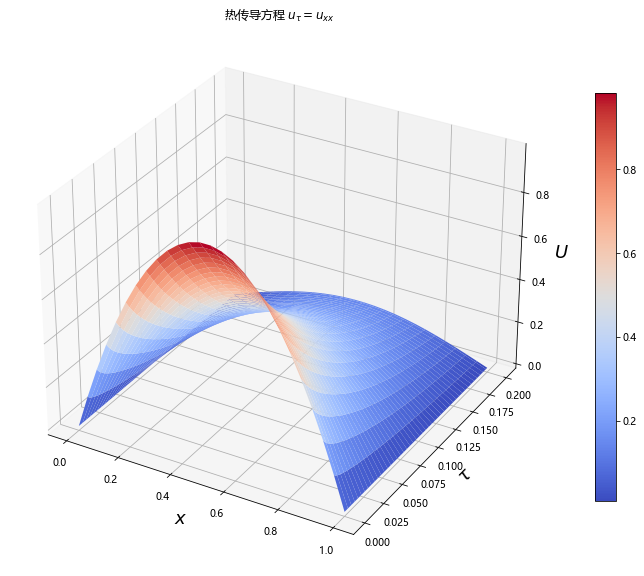

In [4]:
# 三维立体图查看整体热传导过程
tArray = np.linspace(0, 0.2, int(0.2/dt)+1)
xGride, tGride = np.meshgrid(xArray, tArray)
from mpl_toolkits.mplot3d import Axes3D
from matplotlib import cm
fig = pylab.figure(figsize=(16,10))
ax = fig.add_subplot(1,1,1,projection='3d')
surface = ax.plot_surface(xGride, tGride, U[:,:int(0.2/dt)+1].T, cmap=cm.coolwarm)
ax.set_xlabel("$x$", fontdict={"size":18})
ax.set_ylabel(r"$\tau$", fontdict={"size":18})
ax.set_zlabel(r"$U$", fontdict={"size":18})
ax.set_title(u"热传导方程 $u_\\tau = u_{xx}$")
fig.colorbar(surface, shrink=0.75)

![](./img/P8_7.png)

![](./img/P8_8.png)

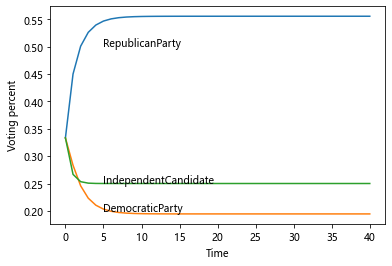

[0.33333, 0.4499955, 0.500828325, 0.52611973875, 0.5394966883125, 0.5467473449718749, 0.5507138730145312, 0.5528911968139921, 0.5540878715788957, 0.5547458720346327, 0.5551077381522961, 0.5553067576904125, 0.5554162170710568, 0.5554764194573473, 0.5555095307151943, 0.5555277418960876, 0.5555377580433943, 0.5555432669239762, 0.5555462968082088, 0.5555479632445193, 0.5555488797844865, 0.5555493838814678, 0.5555496611348074, 0.5555498136241441, 0.5555498974932793, 0.5555499436213037, 0.5555499689917172, 0.5555499829454446, 0.5555499906199945, 0.5555499948409971, 0.5555499971625485, 0.5555499984394018, 0.555549999141671, 0.5555499995279192, 0.5555499997403557, 0.5555499998571958, 0.5555499999214578, 0.555549999956802, 0.5555499999762412, 0.5555499999869329, 0.5555499999928133]
[0.33333, 0.28333050000000004, 0.24583087500000003, 0.22320610125000004, 0.21036247968750002, 0.20321848862812503, 0.19927329370546876, 0.1971002365300078, 0.1959044150899043, 0.19524658529912736, 0.19488475331445604

In [11]:
import matplotlib.pyplot as plt
RLIST = [0.33333]
DLIST = [0.33333]
ILIST = [0.33333]
for i in range(40):
    R = RLIST[i]*0.75+DLIST[i]*0.20+ILIST[i]*0.40
    RLIST.append(R)
    D = RLIST[i]*0.05+DLIST[i]*0.60+ILIST[i]*0.20
    DLIST.append(D)
    I = RLIST[i]*0.20+DLIST[i]*0.20+ILIST[i]*0.40
    ILIST.append(I)

plt.plot(RLIST)
plt.plot(DLIST)
plt.plot(ILIST)
plt.xlabel('Time')
plt.ylabel('Voting percent')
plt.annotate('DemocraticParty', xy = (5,0.2))
plt.annotate('RepublicanParty', xy = (5,0.5))
plt.annotate('IndependentCandidate', xy = (5,0.25))
plt.show()
print(RLIST)
print(DLIST)
print(ILIST)